<a href="https://colab.research.google.com/github/hesther/teaching/blob/main/python101/Python_for_Beginners_Cheminfo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical reactions
We can also manipulate molecules, such as deleting or adding substructures, or performing reactions. For example, let us oxidize all all alcohols to ketones or aldehydes if possible (possible if there is at least one hydrogen attached to the carbonyl carbon!)


In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 53.7 MB/s eta 0:00:00


In [15]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors


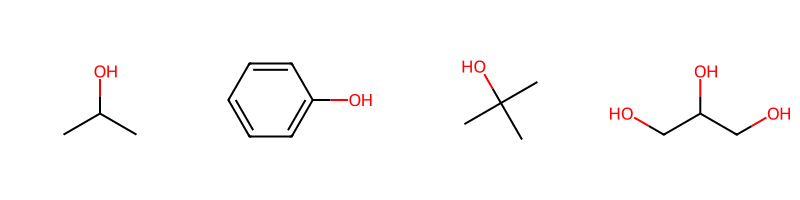

In [7]:
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [isopropanol, phenol, t_butanol, glycerol]

Chem.Draw.MolsToGridImage(alcohols, molsPerRow=4)

In [8]:
rxn = AllChem.ReactionFromSmarts('[CH:1][O:2]>>[C:1]=[O:2]')
rxn.RunReactants((isopropanol,))

((<rdkit.Chem.rdchem.Mol at 0x7ed338230ac0>,),)

In [9]:
rxn.RunReactants((t_butanol,))

()

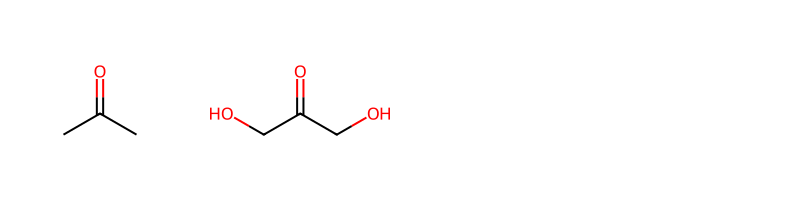

In [10]:
possible_products=[]
for alcohol in alcohols:
  for result in rxn.RunReactants((alcohol,)):
      for product in result:
        possible_products.append(product)
Chem.Draw.MolsToGridImage(possible_products, molsPerRow=4)

# Exercise:
Currently, our reaction only oxidizes secondary alcohols (since we say exactly "CH", not e.g. "CH2"). Change the reaction to primary alcohols ("CH2") and plot all products.

# Application: Predicting water solubility given some data
We can also train a simple linear regression model, e.g. to predict water solubility. Download the SI from https://pubs.acs.org/doi/10.1021/ci034243x and save it as esol.csv

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d = pd.read_csv("esol.csv")
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [19]:
mols = [Chem.MolFromSmiles(x) for x in d['SMILES']]
X = np.array([list(Descriptors.CalcMolDescriptors(mol).values()) for mol in mols])
y = np.array(d['measured log(solubility:mol/L)'])

X.shape, y.shape

((1144, 217), (1144,))

Text(0, 0.5, 'Predicted solubility')

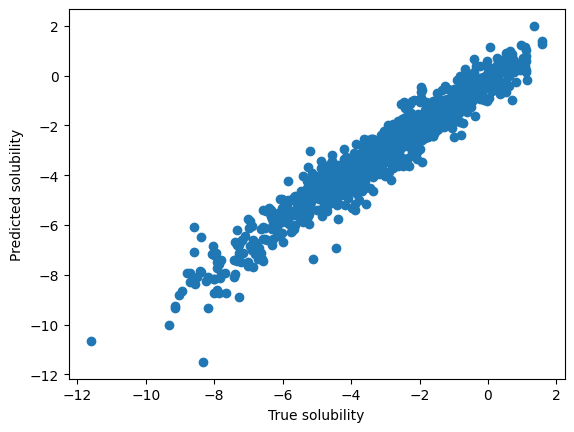

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.scatter(y, y_pred)
plt.xlabel("True solubility")
plt.ylabel("Predicted solubility")

#Substructure search
We could also search a database for a specific pattern, for example we might want to only use molecules that have a carbonyl group. For this, we can use the method `HasSubstructMatch`, which takes two molecules and return either `True` or `False` if the first molecule is a substructure of the second one:


In [21]:
acetone = Chem.MolFromSmiles('CC(=O)C')
acetone

In [22]:
substructure = Chem.MolFromSmiles('C=O')
substructure

In [23]:
acetone.HasSubstructMatch(substructure)

True

In [25]:
d['has C=O']= [Chem.MolFromSmiles(smi).HasSubstructMatch(substructure) for smi in d['SMILES']]
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,False
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,False
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,False
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,False
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,False
...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),True
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,True
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,True
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,True


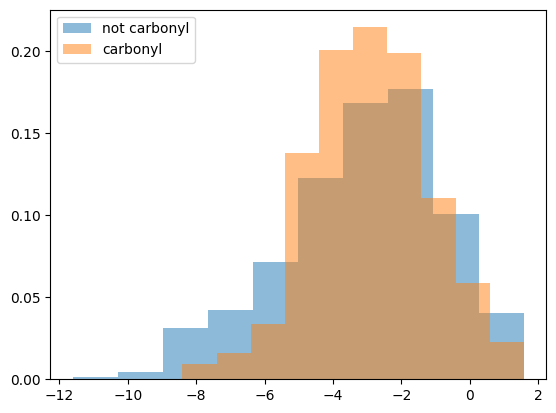

In [38]:
plt.hist(d[d['has C=O']==False]['measured log(solubility:mol/L)'], density=True, alpha=0.5, label='not carbonyl')
plt.hist(d[d['has C=O']==True]['measured log(solubility:mol/L)'], density=True,  alpha=0.5, label='carbonyl')

plt.legend()

#Exercise:
Make another column in the dataframe whether the molecule contains an alcohol ("OH") group and plot whether this changes the distribution of measured solubilities

# Molecular Properties and Filtering (Drug-likeness)
In drug discovery, we often filter molecules based on physicochemical properties.
One common guideline is Lipinski’s Rule of Five:
* Molecular weight ≤ 500
* logP ≤ 5
* ≤ 5 hydrogen-bond donors
* ≤ 10 hydrogen-bond acceptors

Let’s apply these filters with RDKit.

In [53]:
d["MolWt"] = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["LogP"] = [Descriptors.MolLogP(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["HBD"] = [Descriptors.NumHDonors(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["HBA"] = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]

d["Lipinski_pass"] = ( (d["MolWt"] <= 500) & (d["LogP"] <= 5) & (d["HBD"] <= 5) & (d["HBA"] <= 10) )
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O,has CO,MolWt,LogP,HBD,HBA,Lipinski_pass
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,False,False,167.850,2.59540,0,0,True
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,False,False,133.405,2.37650,0,0,True
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,False,False,167.850,2.59380,0,0,True
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,False,False,133.405,2.02890,0,0,True
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,False,False,187.375,2.91890,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),True,True,287.343,1.98820,1,6,True
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,True,True,286.114,3.42130,0,3,True
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,True,True,308.333,3.60960,1,4,True
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,True,True,354.815,2.56214,3,4,True


In [54]:
d[d["Lipinski_pass"]==False]

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O,has CO,MolWt,LogP,HBD,HBA,Lipinski_pass
84,1-Hexadecanol,-7.000,-4.940,CCCCCCCCCCCCCCCCO,False,True,242.447,5.46000,1,1,False
105,1-Octadecanol,-8.400,-5.649,CCCCCCCCCCCCCCCCCCO,False,True,270.501,6.24020,1,1,False
109,1-Pentadecanol,-6.350,-4.586,CCCCCCCCCCCCCCCO,False,True,228.420,5.06990,1,1,False
116,"2,2',3,3',4,4',5,5',6,6'-PCB",-11.600,-9.589,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,False,False,498.662,9.88760,0,0,False
117,"2,2',3,3',4,4',5,5'-PCB",-9.160,-8.468,Clc1cc(c(Cl)c(Cl)c1Cl)c2cc(Cl)c(Cl)c(Cl)c2Cl,False,False,429.772,8.58080,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
1085,Tetrafluthrin,-7.321,-6.339,Cc1c(F)c(F)c(COC(=O)C2C(C=C(Cl)C(F)(F)F)C2(C)C...,True,True,418.736,5.55182,0,2,False
1124,Trichloronate,-5.752,-5.225,CCOP(=S)(CC)Oc1cc(Cl)c(Cl)cc1Cl,False,True,333.604,5.39150,0,3,False
1125,Triclosan,-4.460,-5.645,Oc1cc(Cl)ccc1Oc2ccc(Cl)cc2Cl,False,True,289.545,5.14470,1,2,False
1126,Tricresyl phosphate,-6.010,-6.390,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,False,True,368.369,6.25676,0,4,False


# Exercise:
Find one molecule each that does (and does not) pass Lipinski's filter (e.g. by selecting molecules from pubchem, or molecules used today or yesterday) and check manually that the assignment was correct.